<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/DR_model_good_prediction_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR2', 'DR3', 'DR1']

In [ ]:
train = '/content/drive/MyDrive/DR fundus images/split/train'
val = '/content/drive/MyDrive/DR fundus images/split/val'
test = '/content/drive/MyDrive/DR fundus images/split/test'

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory(train,
                                          target_size=(64,64),
                                          class_mode='categorical')
valimages = datagen.flow_from_directory(val,
                                        target_size=(64,64),
                                        class_mode='categorical')
testimages = datagen.flow_from_directory(test,
                                         target_size=(64,64),
                                         class_mode='categorical')

Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),



                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(3, activation='softmax')])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 12544)             0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [ ]:
model.fit(trainimages,
          batch_size=32,
          epochs=10,
          validation_data=valimages)
model.save('DR_model.keras')

Epoch 1/10
3/3 [==============================] - 6s 3s/step - loss: 0.3467 - accuracy: 0.8333 - val_loss: 0.5793 - val_accuracy: 0.7143
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.2762 - accuracy: 0.8846 - val_loss: 0.5777 - val_accuracy: 0.7857
Epoch 3/10
3/3 [==============================] - 6s 3s/step - loss: 0.2881 - accuracy: 0.8974 - val_loss: 0.5349 - val_accuracy: 0.7143
Epoch 4/10
3/3 [==============================] - 5s 1s/step - loss: 0.2468 - accuracy: 0.9103 - val_loss: 0.5090 - val_accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 6s 3s/step - loss: 0.2061 - accuracy: 0.9359 - val_loss: 0.5226 - val_accuracy: 0.7143
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.1959 - accuracy: 0.9487 - val_loss: 0.5086 - val_accuracy: 0.7143
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.1971 - accuracy: 0.9231 - val_loss: 0.5311 - val_accuracy: 0.7143
Epoch 8/10
3/3 [=========================

In [ ]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 727ms/step


array([[9.49477196e-01, 1.19501771e-02, 3.85724790e-02],
       [3.03986073e-01, 2.16300920e-01, 4.79713053e-01],
       [1.07491622e-03, 6.83836281e-01, 3.15088838e-01],
       [1.11985837e-05, 1.91829279e-01, 8.08159590e-01],
       [1.03508038e-02, 1.37021214e-01, 8.52627993e-01],
       [1.79327765e-06, 9.98601794e-01, 1.39639853e-03],
       [8.32771620e-05, 5.91795444e-01, 4.08121318e-01],
       [5.74048655e-03, 6.16077542e-01, 3.78182024e-01],
       [9.94427130e-03, 8.34244728e-01, 1.55810967e-01],
       [1.14751645e-04, 7.29939938e-02, 9.26891267e-01],
       [6.32235754e-07, 9.97952163e-01, 2.04732595e-03],
       [9.41521585e-01, 8.01551249e-03, 5.04629128e-02],
       [1.12912551e-01, 1.60486773e-02, 8.71038795e-01],
       [2.33954837e-04, 6.16220497e-02, 9.38144028e-01]], dtype=float32)

In [ ]:
y_true = testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2])

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[1, 1, 1],
       [0, 4, 2],
       [1, 1, 3]])

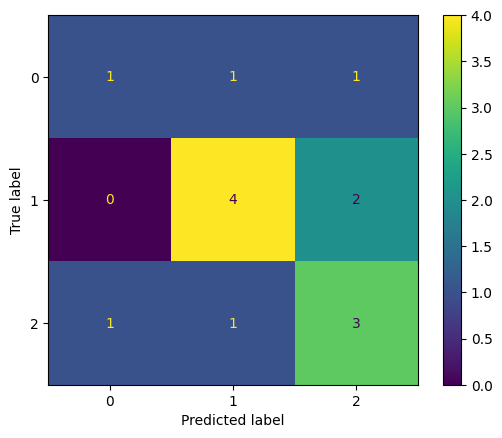

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [ ]:
print(metrics.classification_report(y_true, y_pred1,
                                    target_names=['DR1', 'DR2', 'DR3']))

              precision    recall  f1-score   support

         DR1       0.50      0.33      0.40         3
         DR2       0.67      0.67      0.67         6
         DR3       0.50      0.60      0.55         5

    accuracy                           0.57        14
   macro avg       0.56      0.53      0.54        14
weighted avg       0.57      0.57      0.57        14



In [ ]:
testimages.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}

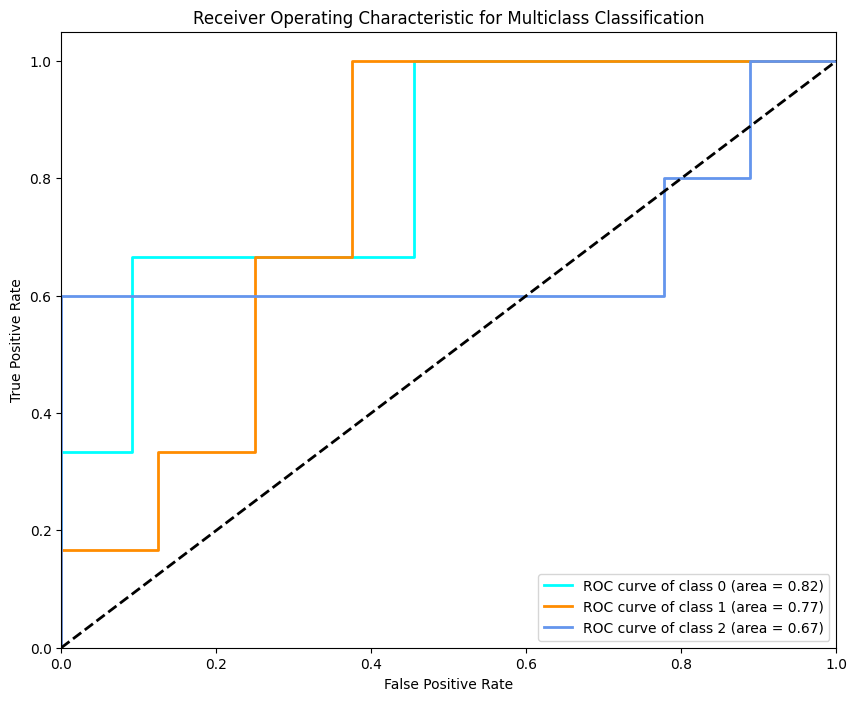

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 150ms/step
Prediction: DR1


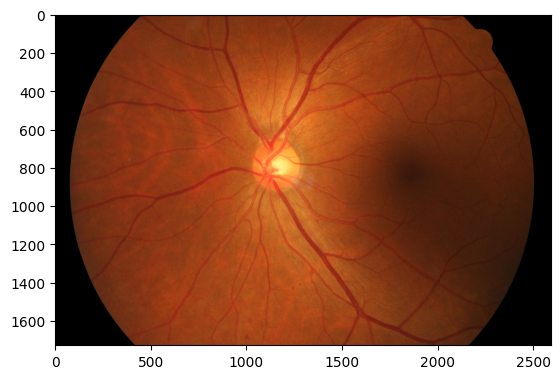

In [166]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DR_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64,64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/DR1/1ffa95b1-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/DR fundus images/DR1/1ffa95b1-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 0s 51ms/step
Prediction: DR2


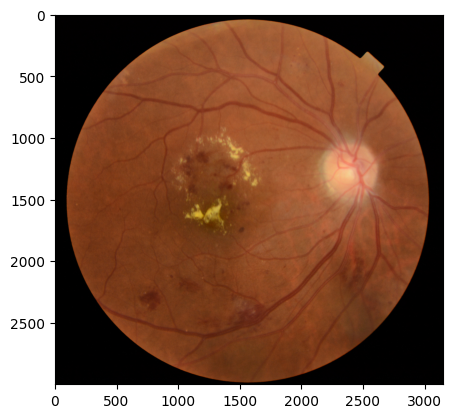

In [167]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage1 = image.load_img('/content/drive/MyDrive/DR fundus images/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage1)


1/1 [==============================] - 0s 140ms/step
Prediction: DR3


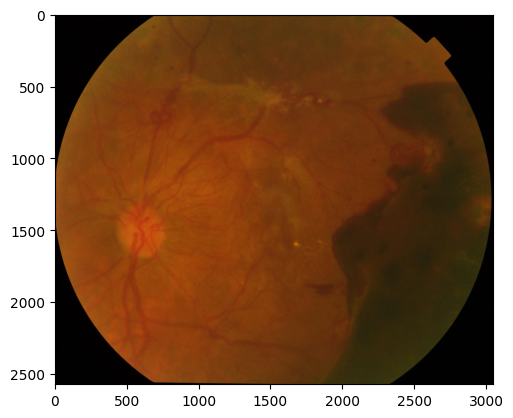

In [168]:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/DR3/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage2 = image.load_img('/content/drive/MyDrive/DR fundus images/DR3/1ffa92e3-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage2)
